<a href="https://colab.research.google.com/github/Dhruv-i023/DRUM-KIT/blob/main/fcc_MAGIC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["flength", "fwidth", "fsize", "fconc", "fconc1", "fasym", "fm3long", "fm3trans", "faplha", "fdist", "class"]
df = pd.read_csv("magic04.data", names = cols)
df.head()

flength    fwidth   fsize   fconc  fconc1     fasym  fm3long  fm3trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    faplha     fdist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [4]:
df["class"] = (df["class"] == 'g').astype(int)

In [5]:
df.head()

flength    fwidth   fsize   fconc  fconc1     fasym  fm3long  fm3trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    faplha     fdist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

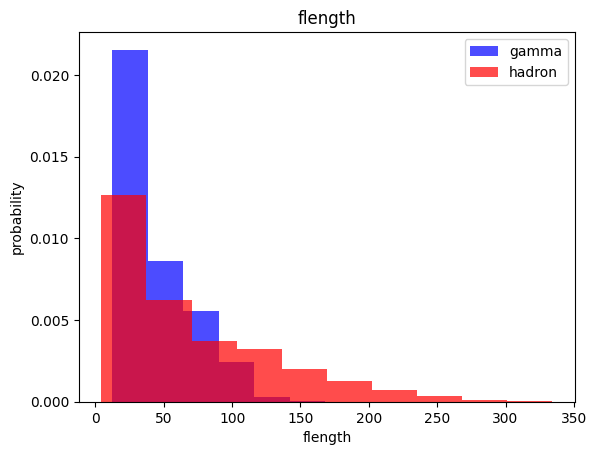

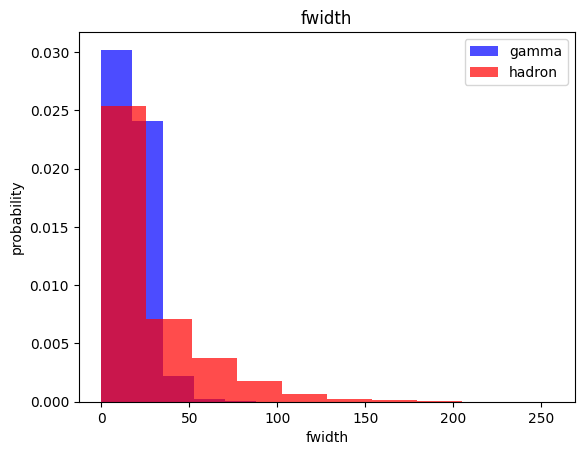

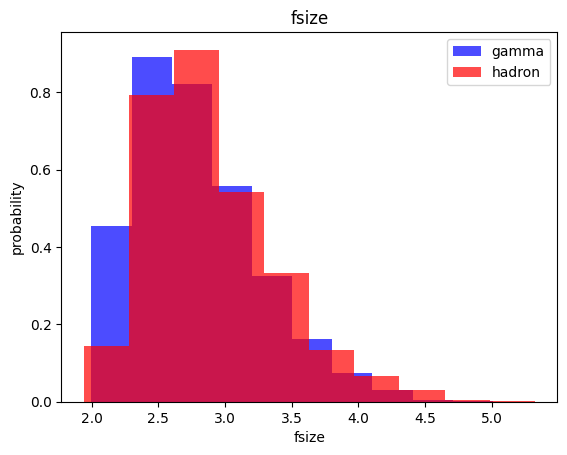

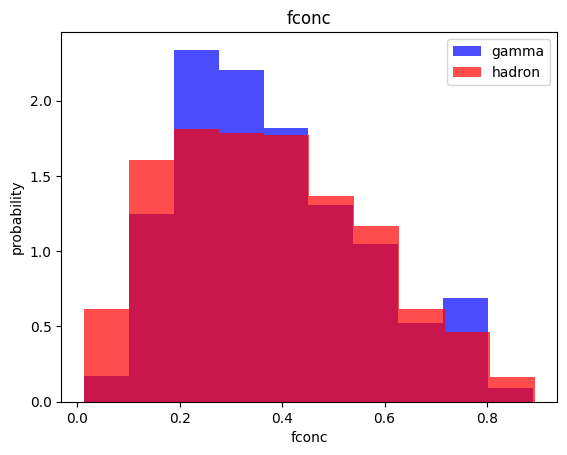

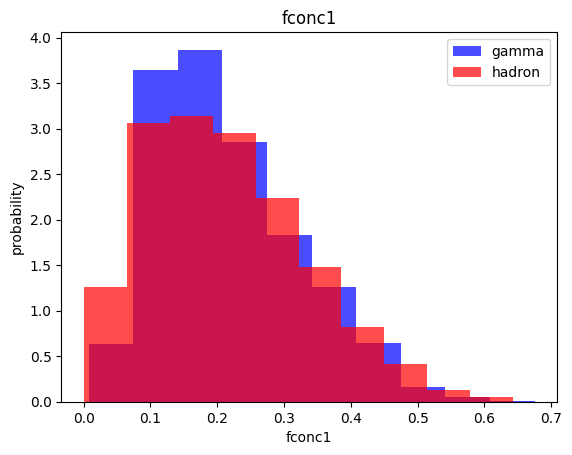

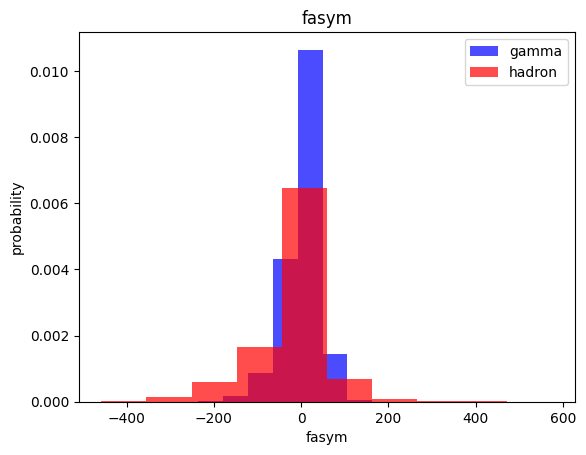

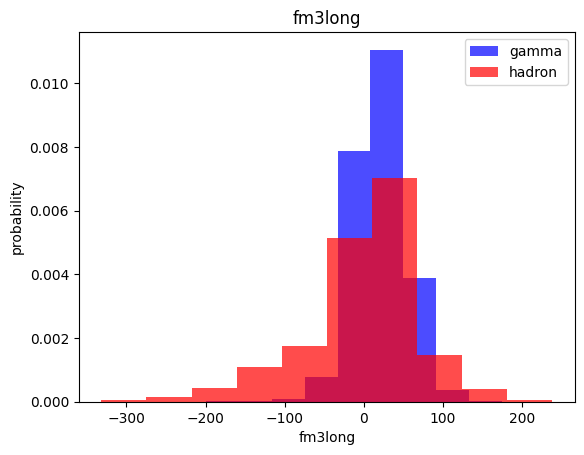

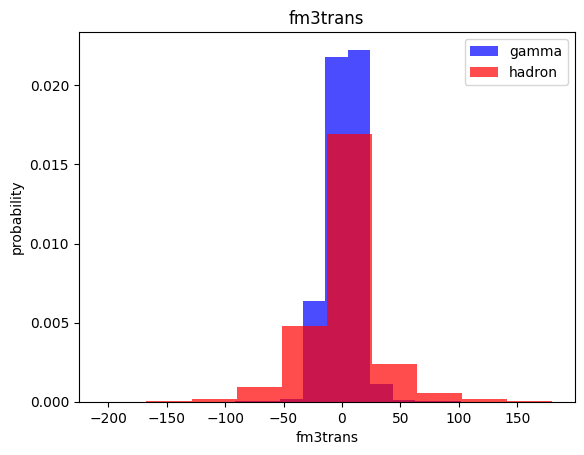

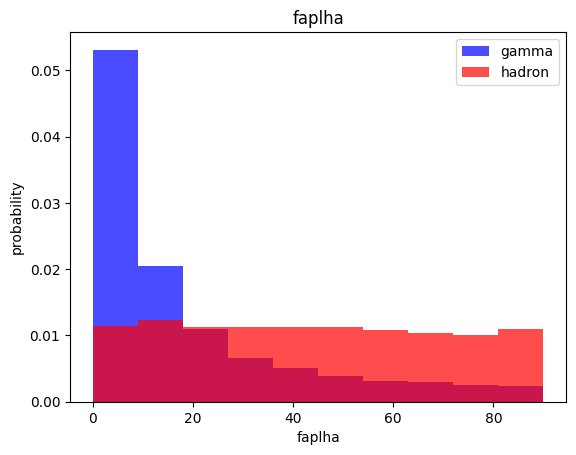

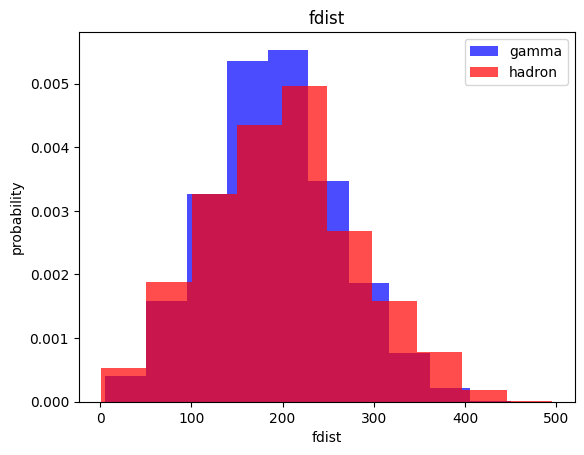

In [6]:
for label in cols[0:10]:
  pt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
  pt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.7, density=True)
  pt.title(label)
  pt.ylabel("probability")
  pt.xlabel(label)
  pt.legend()
  pt.show()

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int((0.8)*len(df))])

In [8]:
def scale_data(dataframe, overSample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if(overSample):
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x, np.reshape(y, (-1,1))))

  return data, x, y

In [9]:
train, x_train, y_train = scale_data(train, overSample=True)
valid, x_valid, y_valid = scale_data(valid, overSample=False)
test, x_test, y_test = scale_data(test, overSample=False)


In [10]:
print(len(x_train))
print(len(y_train))
print(len(x_valid))
print(len(y_valid))
print(len(x_test))
print(len(y_test))

14818
14818
3804
3804
3804
3804


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [12]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [13]:
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1340
           1       0.84      0.89      0.86      2464

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.82      0.81      3804



In [14]:
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [17]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.43      0.53      1340
           1       0.74      0.90      0.81      2464

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



In [18]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1340
           1       0.84      0.82      0.83      2464

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



In [19]:
from sklearn.svm import SVC
sv_model = SVC()
sv_model = sv_model.fit(x_train, y_train)

y_pred = sv_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1340
           1       0.90      0.90      0.90      2464

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Tensor Flow

In [20]:
import tensorflow as tf

In [21]:
def plot_loss(history):
  pt.plot(history.history["loss"], label="loss")
  pt.plot(history.history["val_loss"], label="val_loss")
  pt.xlabel("Epoch")
  pt.ylabel("binary_crossentropy")
  pt.legend()
  pt.grid(True)
  pt.show()

def plot_accuracy(history):
  pt.plot(history.history["accuracy"], label="accuracy")
  pt.plot(history.history["val_accuracy"], label="val_accuracy")
  pt.xlabel("Epoch")
  pt.ylabel("accuracy")
  pt.legend()
  pt.grid(True)
  pt.show()


In [22]:
def plot_history(history):
  fig, (ax1, ax2) = pt.subplots(1,2, figsize = (10,4))
  ax1.plot(history.history["loss"], label="loss")
  ax1.plot(history.history["val_loss"], label="val_loss")
  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("binary_crossentropy")
  ax1.grid(True)

  ax2.plot(history.history["accuracy"], label="accuracy")
  ax2.plot(history.history["val_accuracy"], label="val_accuracy")
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("accuracy")
  ax2.grid(True)

  pt.show()


In [23]:
def train_model(x_train, y_train, num_nodes, dropout_prob,  lr, batch_size, epochs):

  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation="sigmoid")
  ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss="binary_crossentropy", metrics=["accuracy"])
  history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size = batch_size, validation_split=0.2, verbose=0)

  return nn_model, history

no. of nodes: 16, dropout: 0, batch_size: 32, learning rate: 0.01


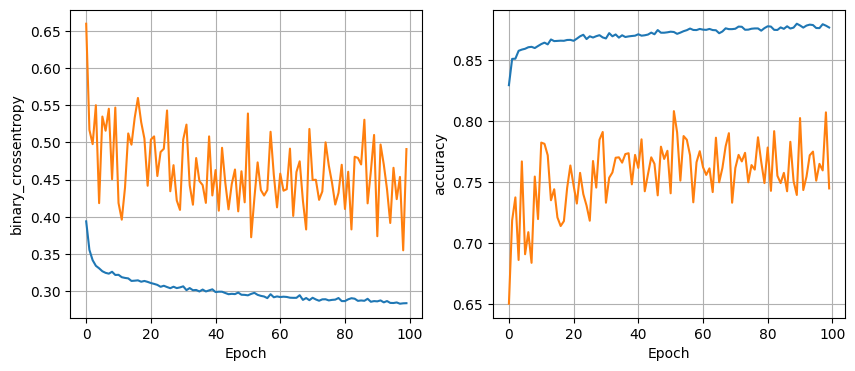

119/119 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8675
no. of nodes: 16, dropout: 0, batch_size: 64, learning rate: 0.01


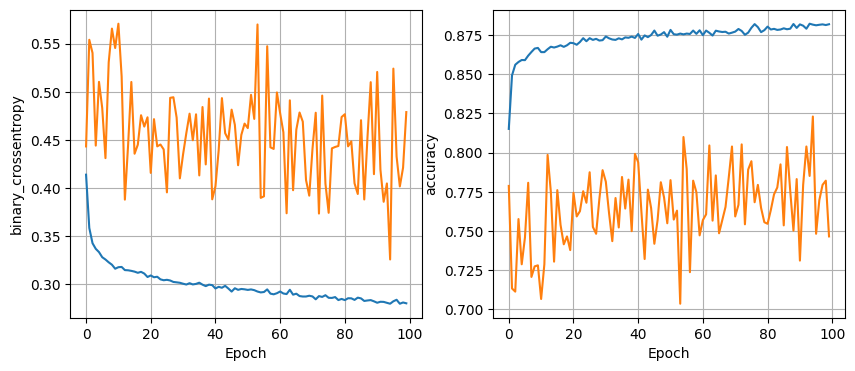

119/119 [==============================] - 0s 1ms/step - loss: 0.3123 - accuracy: 0.8641
no. of nodes: 16, dropout: 0, batch_size: 128, learning rate: 0.01


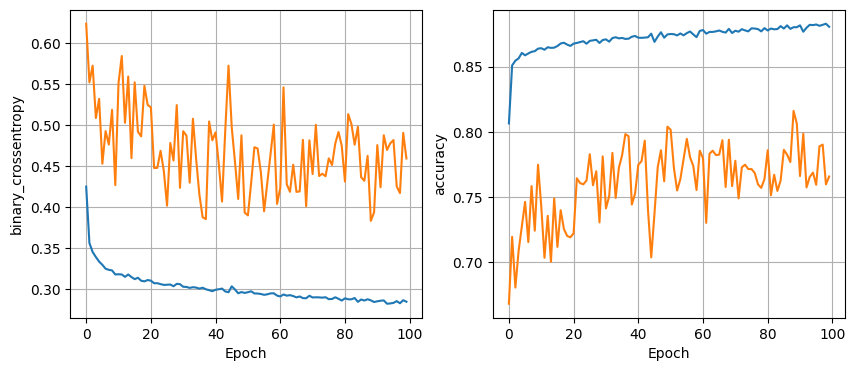

119/119 [==============================] - 0s 1ms/step - loss: 0.3026 - accuracy: 0.8699
no. of nodes: 16, dropout: 0, batch_size: 32, learning rate: 0.005


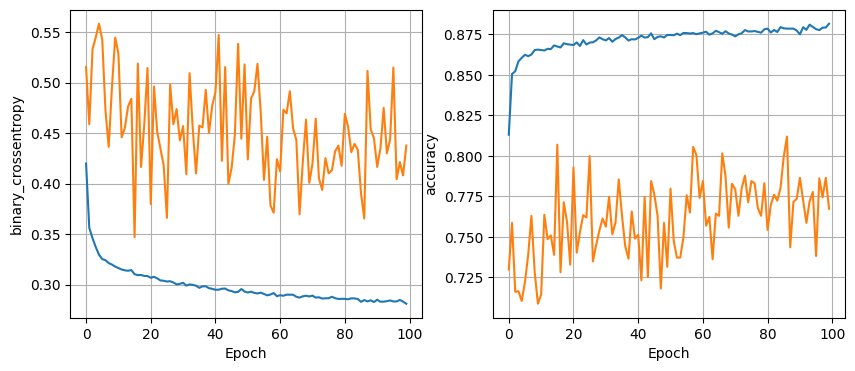

119/119 [==============================] - 0s 1ms/step - loss: 0.3123 - accuracy: 0.8696
no. of nodes: 16, dropout: 0, batch_size: 64, learning rate: 0.005


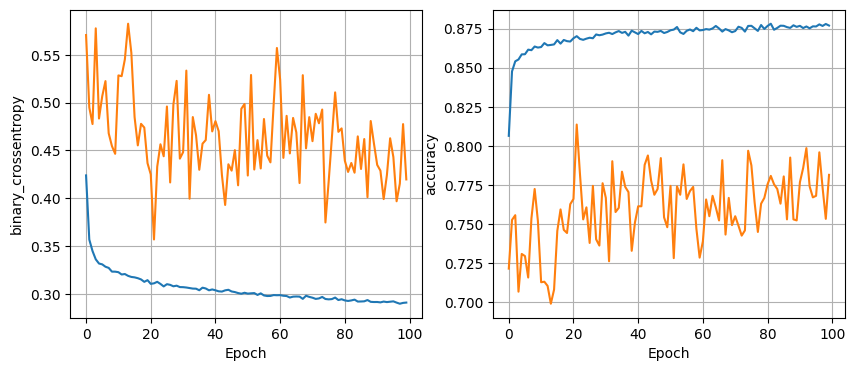

119/119 [==============================] - 0s 1ms/step - loss: 0.3066 - accuracy: 0.8741
no. of nodes: 16, dropout: 0, batch_size: 128, learning rate: 0.005


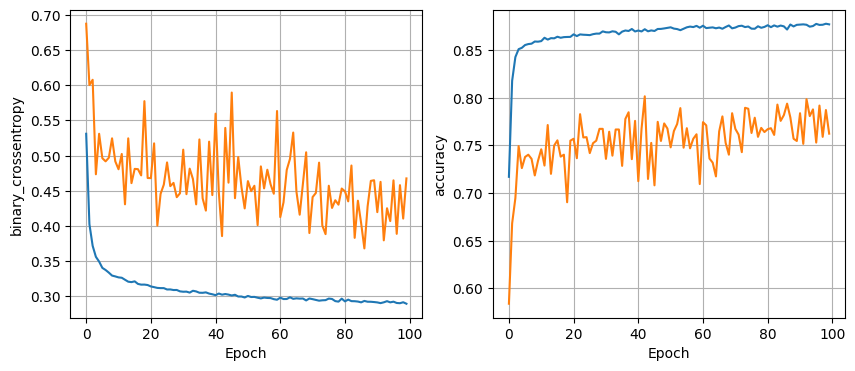

119/119 [==============================] - 0s 1ms/step - loss: 0.3036 - accuracy: 0.8728
no. of nodes: 16, dropout: 0, batch_size: 32, learning rate: 0.001


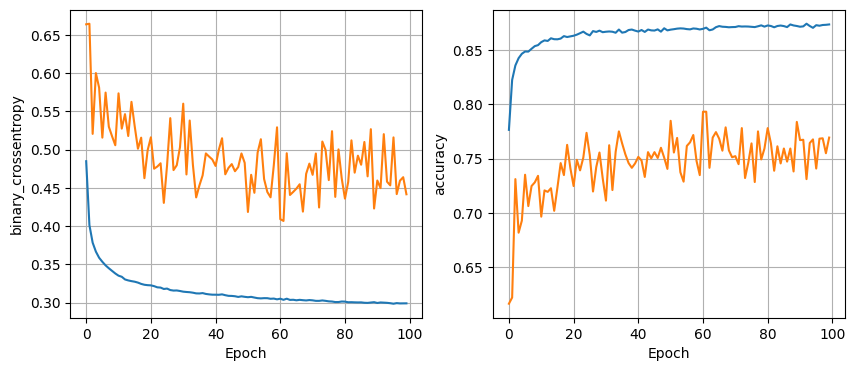

119/119 [==============================] - 0s 1ms/step - loss: 0.3016 - accuracy: 0.8746
no. of nodes: 16, dropout: 0, batch_size: 64, learning rate: 0.001


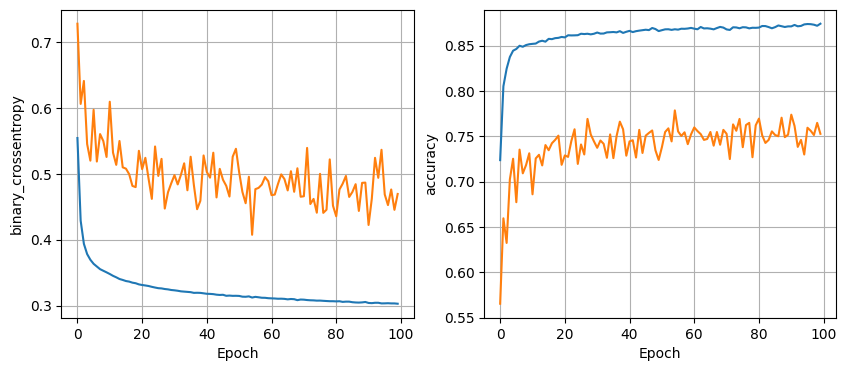

119/119 [==============================] - 0s 1ms/step - loss: 0.3073 - accuracy: 0.8712
no. of nodes: 16, dropout: 0, batch_size: 128, learning rate: 0.001


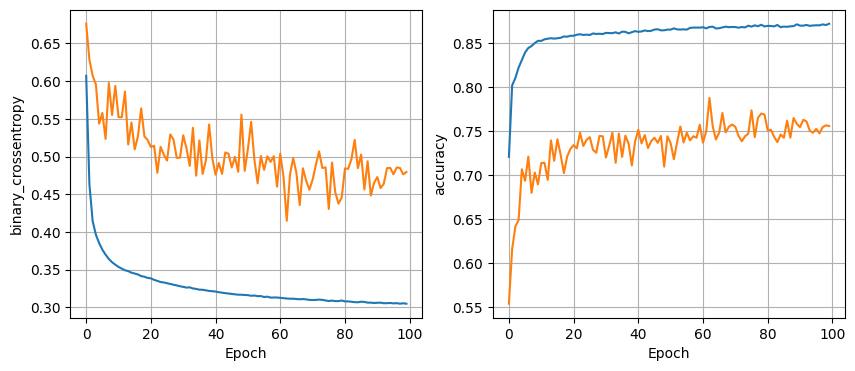

119/119 [==============================] - 0s 1ms/step - loss: 0.3064 - accuracy: 0.8722
no. of nodes: 16, dropout: 0.2, batch_size: 32, learning rate: 0.01


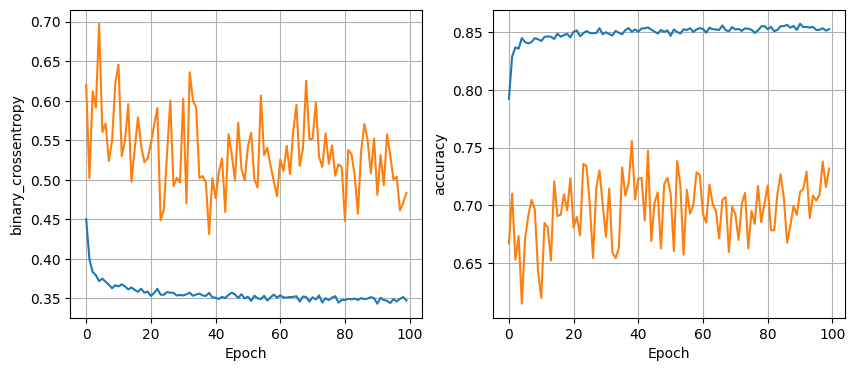

119/119 [==============================] - 0s 1ms/step - loss: 0.3107 - accuracy: 0.8675
no. of nodes: 16, dropout: 0.2, batch_size: 64, learning rate: 0.01


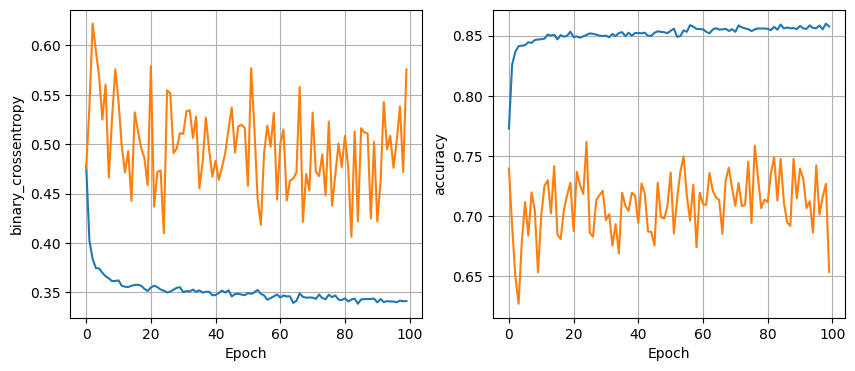

119/119 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.8575
no. of nodes: 16, dropout: 0.2, batch_size: 128, learning rate: 0.01


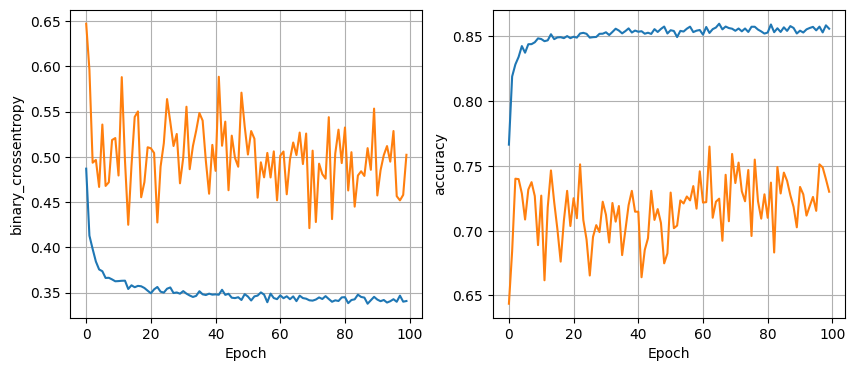

119/119 [==============================] - 0s 2ms/step - loss: 0.3041 - accuracy: 0.8749
no. of nodes: 16, dropout: 0.2, batch_size: 32, learning rate: 0.005


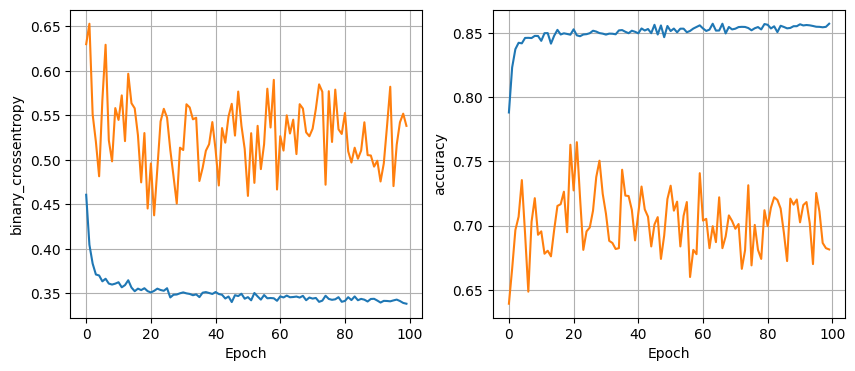

119/119 [==============================] - 0s 1ms/step - loss: 0.3181 - accuracy: 0.8630
no. of nodes: 16, dropout: 0.2, batch_size: 64, learning rate: 0.005


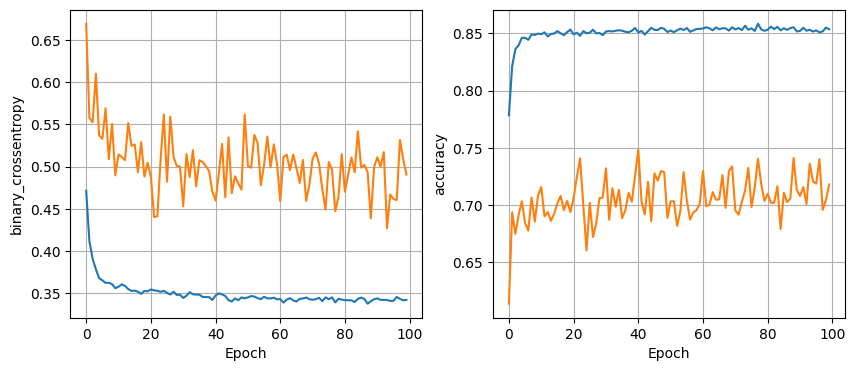

119/119 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8709
no. of nodes: 16, dropout: 0.2, batch_size: 128, learning rate: 0.005


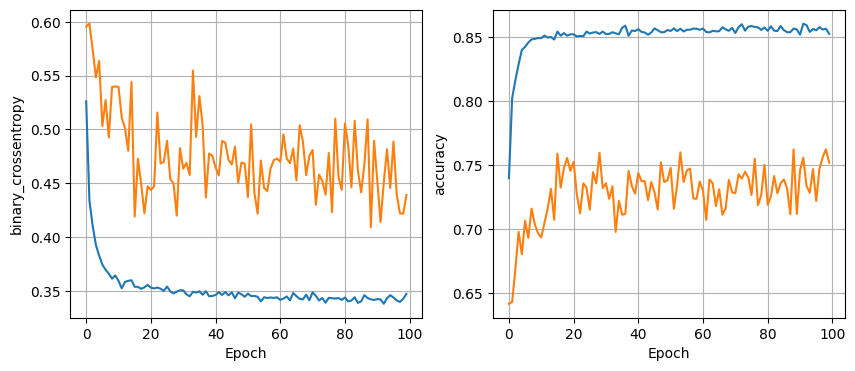

119/119 [==============================] - 0s 1ms/step - loss: 0.3146 - accuracy: 0.8699
no. of nodes: 16, dropout: 0.2, batch_size: 32, learning rate: 0.001


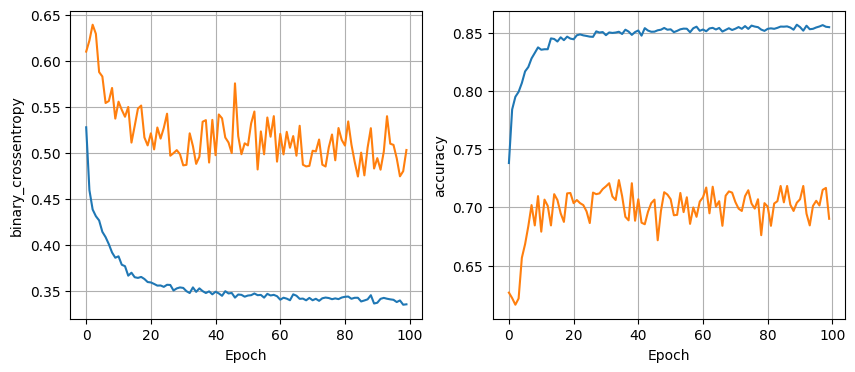

119/119 [==============================] - 0s 1ms/step - loss: 0.3113 - accuracy: 0.8672
no. of nodes: 16, dropout: 0.2, batch_size: 64, learning rate: 0.001


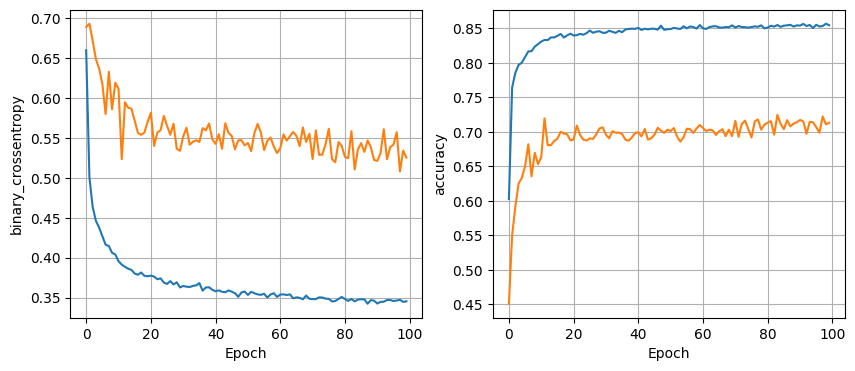

119/119 [==============================] - 0s 1ms/step - loss: 0.3125 - accuracy: 0.8654
no. of nodes: 16, dropout: 0.2, batch_size: 128, learning rate: 0.001


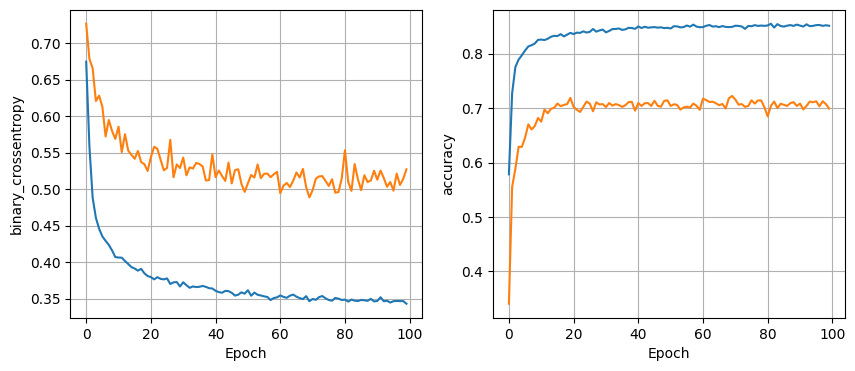

119/119 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8672
no. of nodes: 32, dropout: 0, batch_size: 32, learning rate: 0.01


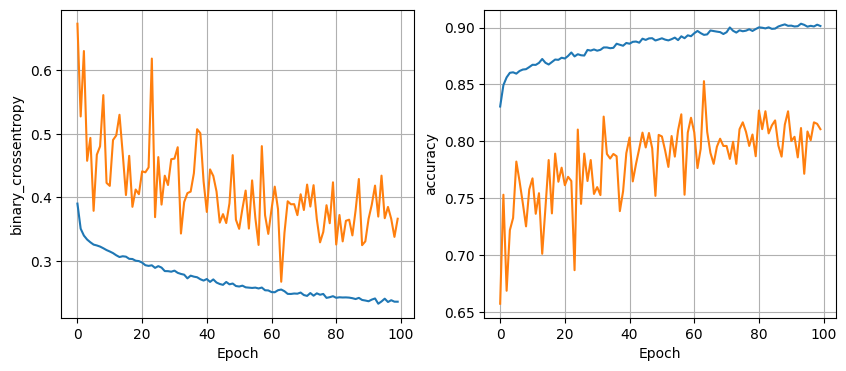

119/119 [==============================] - 0s 1ms/step - loss: 0.3820 - accuracy: 0.8699
no. of nodes: 32, dropout: 0, batch_size: 64, learning rate: 0.01


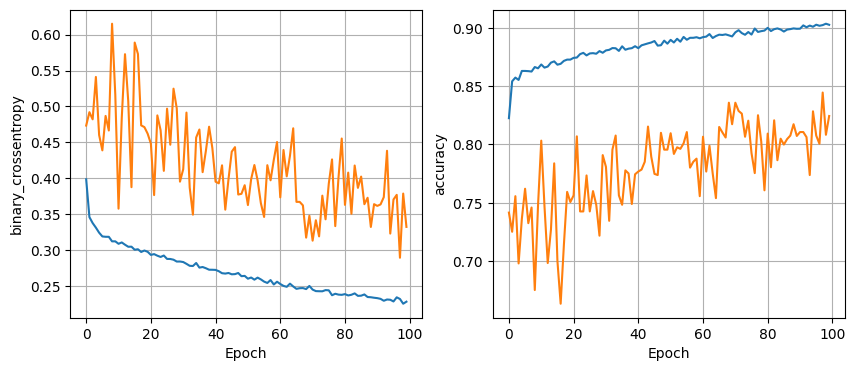

119/119 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.8607
no. of nodes: 32, dropout: 0, batch_size: 128, learning rate: 0.01


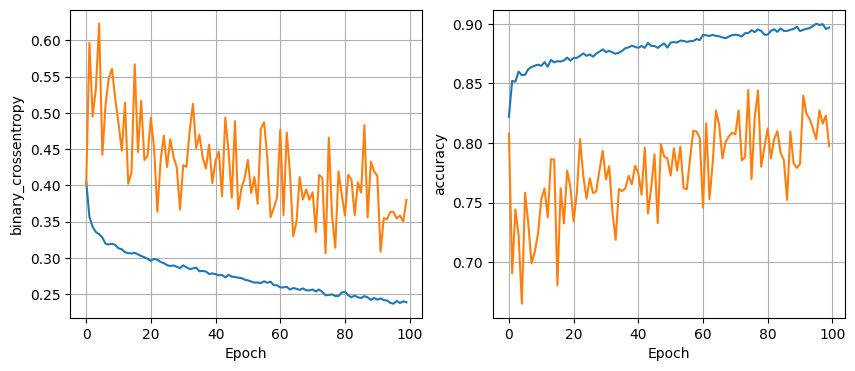

119/119 [==============================] - 0s 1ms/step - loss: 0.3614 - accuracy: 0.8583
no. of nodes: 32, dropout: 0, batch_size: 32, learning rate: 0.005


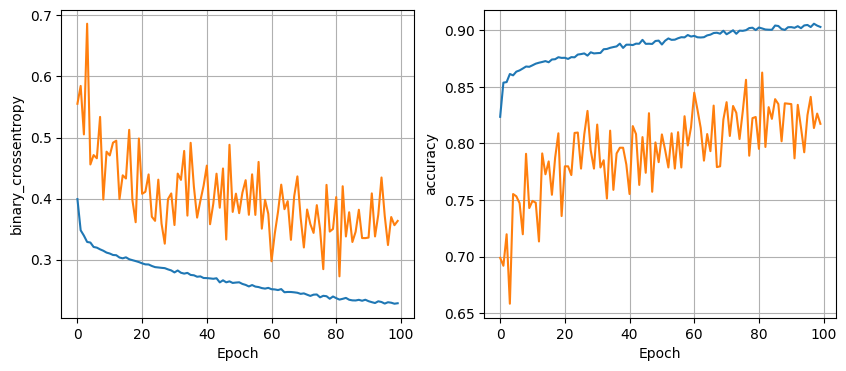

119/119 [==============================] - 0s 1ms/step - loss: 0.3654 - accuracy: 0.8649
no. of nodes: 32, dropout: 0, batch_size: 64, learning rate: 0.005


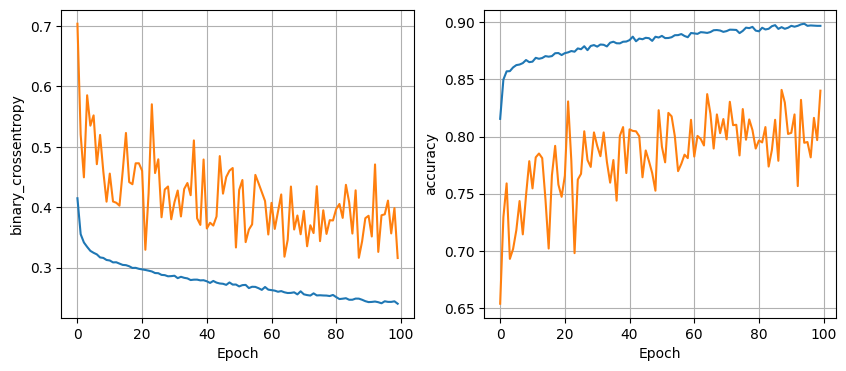

119/119 [==============================] - 0s 1ms/step - loss: 0.3492 - accuracy: 0.8607
no. of nodes: 32, dropout: 0, batch_size: 128, learning rate: 0.005


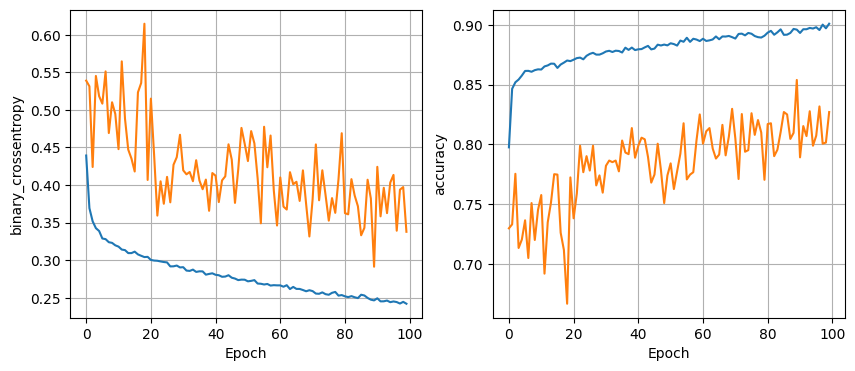

119/119 [==============================] - 0s 1ms/step - loss: 0.3372 - accuracy: 0.8709
no. of nodes: 32, dropout: 0, batch_size: 32, learning rate: 0.001


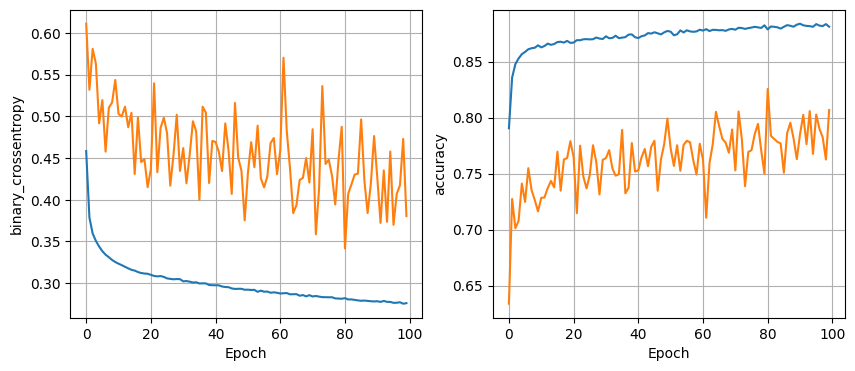

119/119 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8709
no. of nodes: 32, dropout: 0, batch_size: 64, learning rate: 0.001


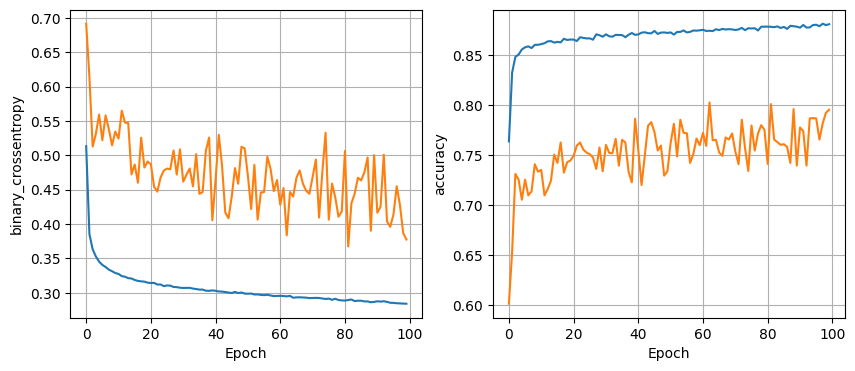

119/119 [==============================] - 0s 1ms/step - loss: 0.3097 - accuracy: 0.8704
no. of nodes: 32, dropout: 0, batch_size: 128, learning rate: 0.001


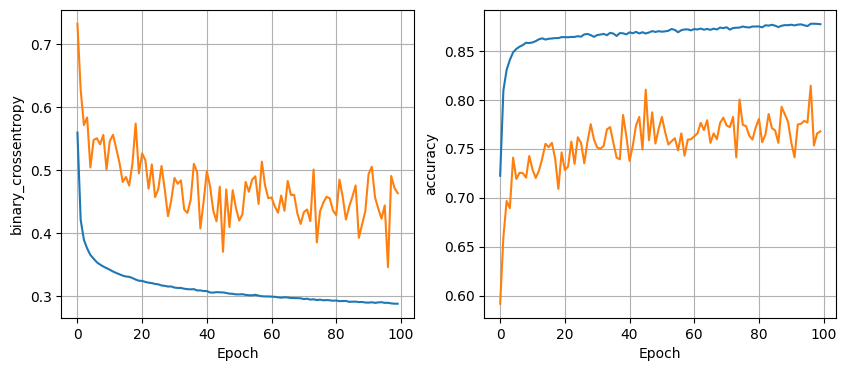

119/119 [==============================] - 0s 1ms/step - loss: 0.3068 - accuracy: 0.8720
no. of nodes: 32, dropout: 0.2, batch_size: 32, learning rate: 0.01


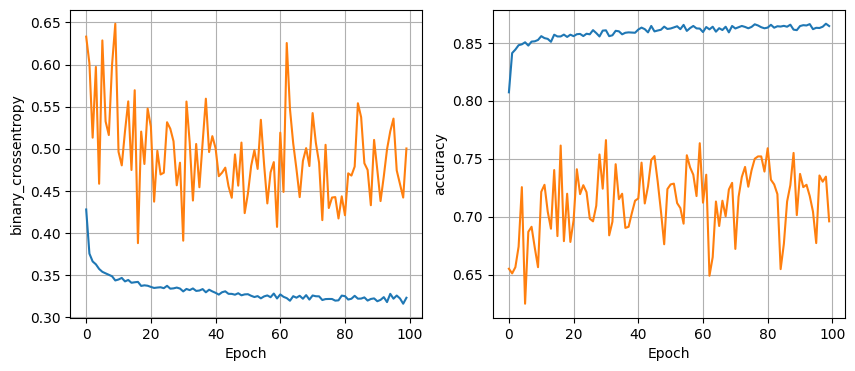

119/119 [==============================] - 0s 1ms/step - loss: 0.3018 - accuracy: 0.8707
no. of nodes: 32, dropout: 0.2, batch_size: 64, learning rate: 0.01


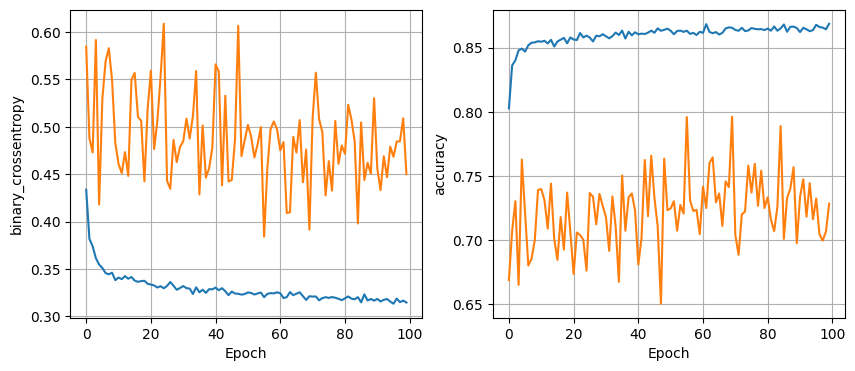

119/119 [==============================] - 0s 1ms/step - loss: 0.3032 - accuracy: 0.8725
no. of nodes: 32, dropout: 0.2, batch_size: 128, learning rate: 0.01


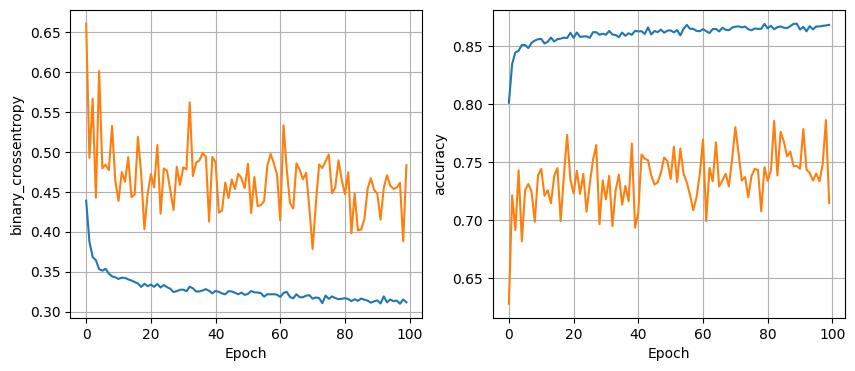

119/119 [==============================] - 0s 1ms/step - loss: 0.3034 - accuracy: 0.8680
no. of nodes: 32, dropout: 0.2, batch_size: 32, learning rate: 0.005


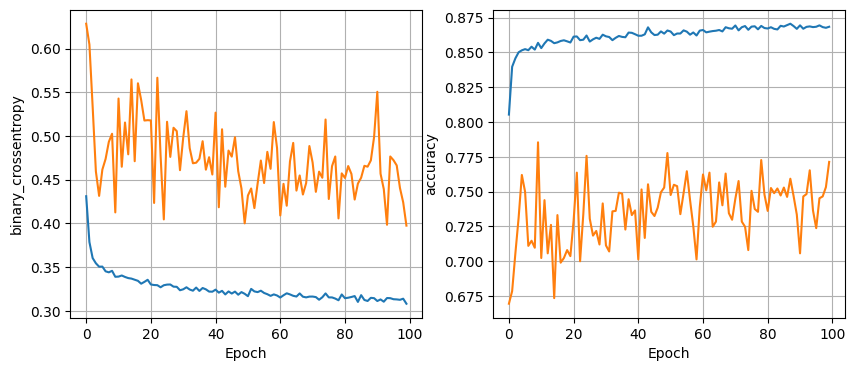

119/119 [==============================] - 0s 1ms/step - loss: 0.3034 - accuracy: 0.8736
no. of nodes: 32, dropout: 0.2, batch_size: 64, learning rate: 0.005


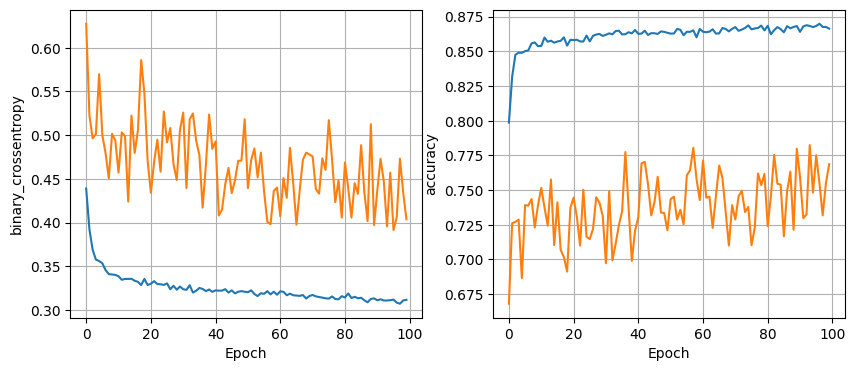

119/119 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.8793
no. of nodes: 32, dropout: 0.2, batch_size: 128, learning rate: 0.005


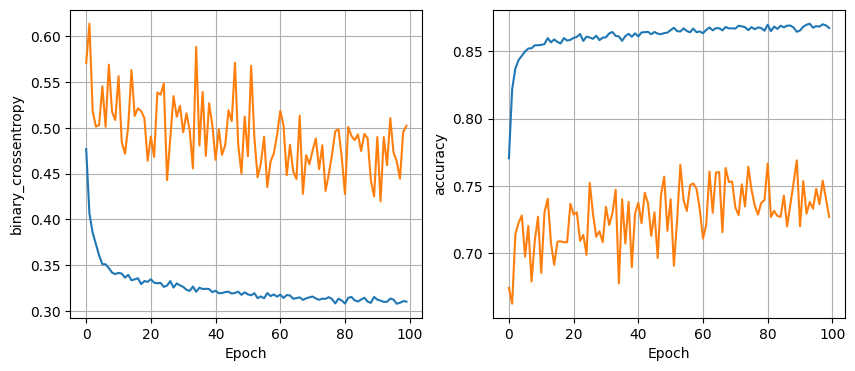

119/119 [==============================] - 0s 1ms/step - loss: 0.2976 - accuracy: 0.8733
no. of nodes: 32, dropout: 0.2, batch_size: 32, learning rate: 0.001


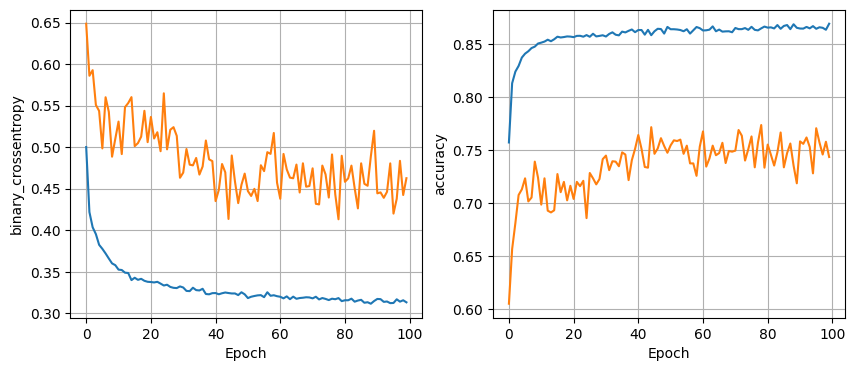

119/119 [==============================] - 0s 1ms/step - loss: 0.2957 - accuracy: 0.8775
no. of nodes: 32, dropout: 0.2, batch_size: 64, learning rate: 0.001


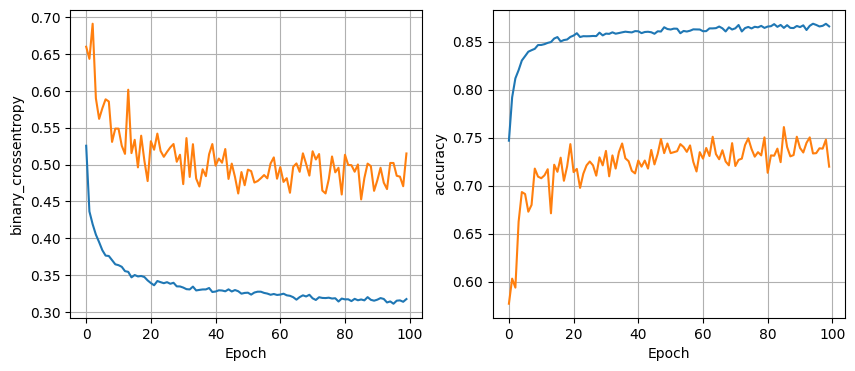

119/119 [==============================] - 0s 1ms/step - loss: 0.2998 - accuracy: 0.8754
no. of nodes: 32, dropout: 0.2, batch_size: 128, learning rate: 0.001


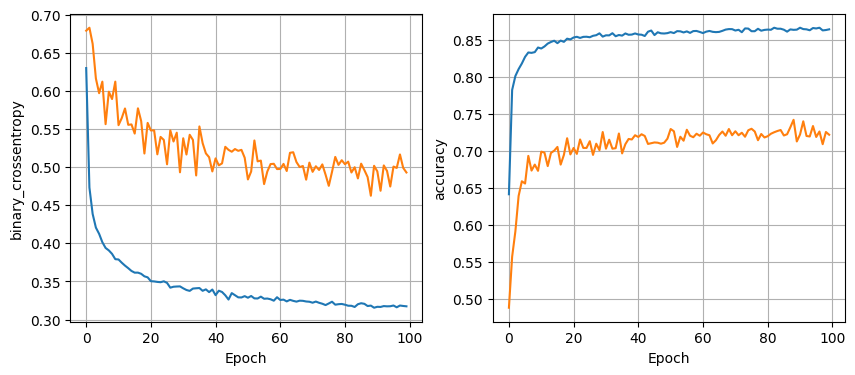

119/119 [==============================] - 0s 1ms/step - loss: 0.2996 - accuracy: 0.8715
no. of nodes: 64, dropout: 0, batch_size: 32, learning rate: 0.01


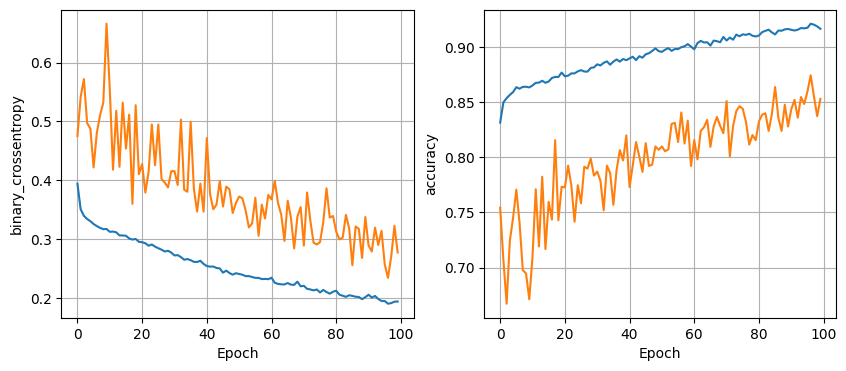

119/119 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.8462
no. of nodes: 64, dropout: 0, batch_size: 64, learning rate: 0.01


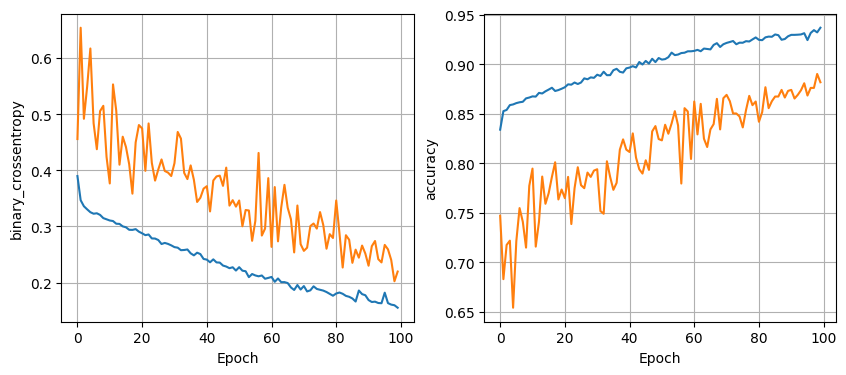

119/119 [==============================] - 0s 1ms/step - loss: 0.5362 - accuracy: 0.8570
no. of nodes: 64, dropout: 0, batch_size: 128, learning rate: 0.01


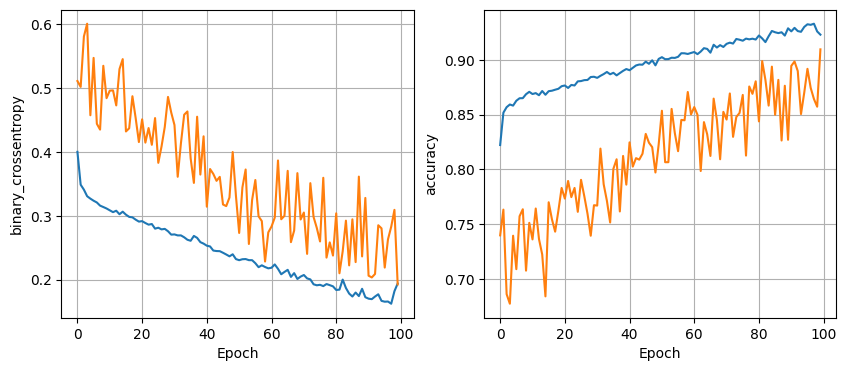

119/119 [==============================] - 0s 1ms/step - loss: 0.5142 - accuracy: 0.8544
no. of nodes: 64, dropout: 0, batch_size: 32, learning rate: 0.005


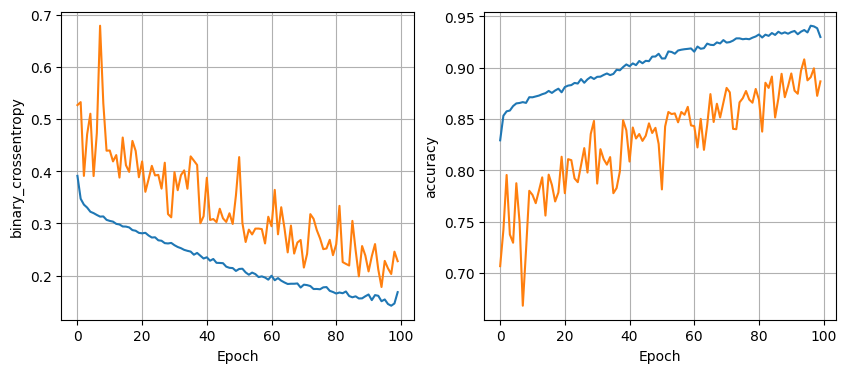

119/119 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.8567
no. of nodes: 64, dropout: 0, batch_size: 64, learning rate: 0.005


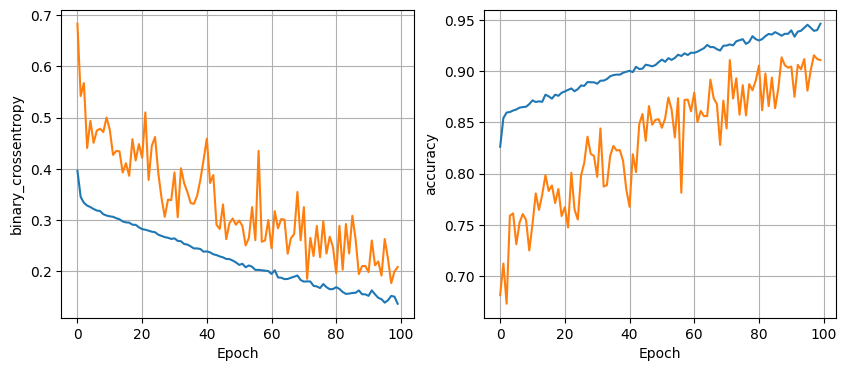

119/119 [==============================] - 0s 1ms/step - loss: 0.5613 - accuracy: 0.8486
no. of nodes: 64, dropout: 0, batch_size: 128, learning rate: 0.005


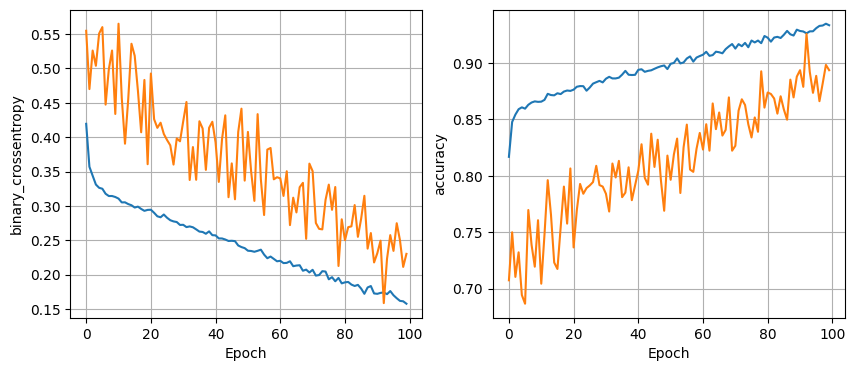

119/119 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.8544
no. of nodes: 64, dropout: 0, batch_size: 32, learning rate: 0.001


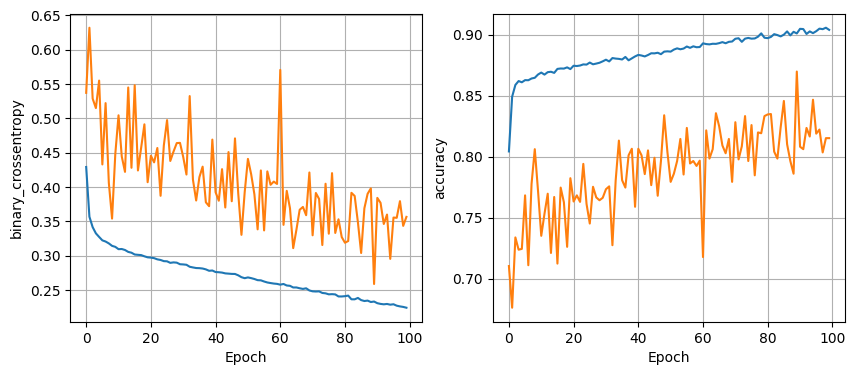

119/119 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8720
no. of nodes: 64, dropout: 0, batch_size: 64, learning rate: 0.001


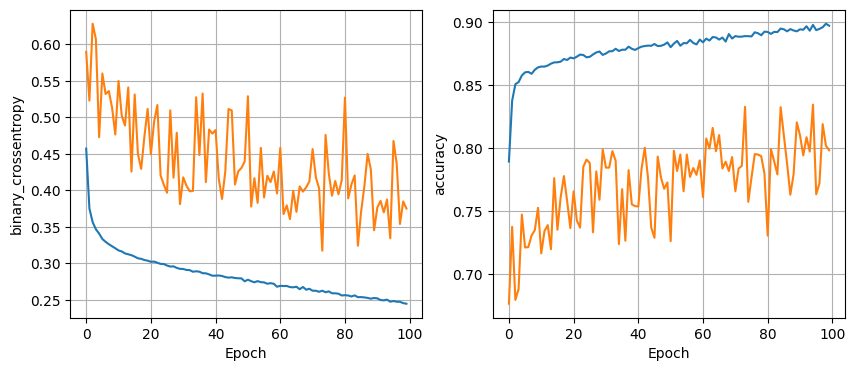

119/119 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.8743
no. of nodes: 64, dropout: 0, batch_size: 128, learning rate: 0.001


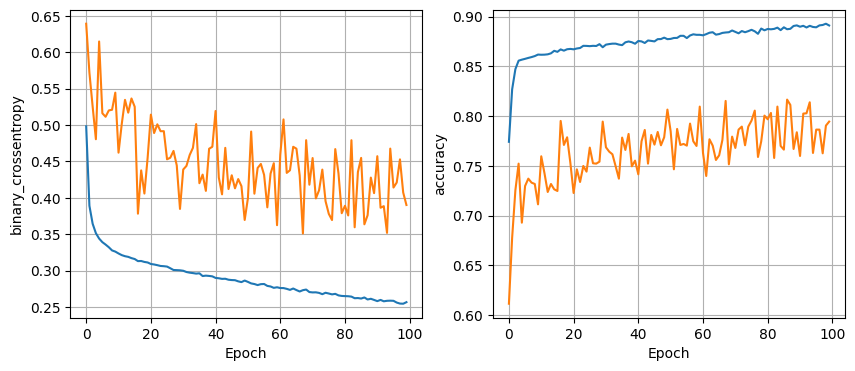

119/119 [==============================] - 0s 1ms/step - loss: 0.3102 - accuracy: 0.8736
no. of nodes: 64, dropout: 0.2, batch_size: 32, learning rate: 0.01


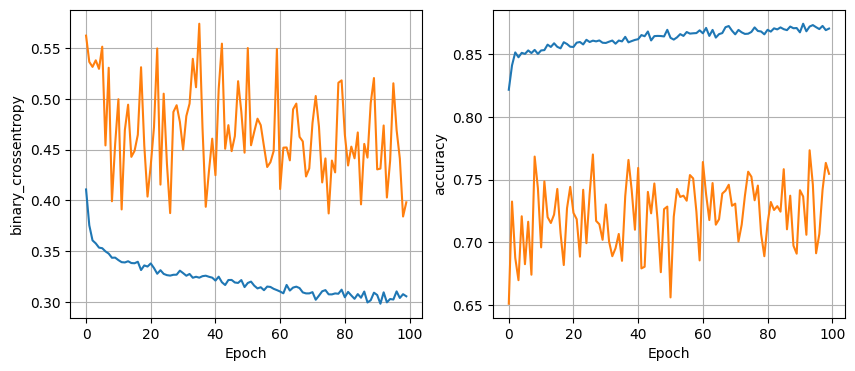

119/119 [==============================] - 0s 1ms/step - loss: 0.3092 - accuracy: 0.8757
no. of nodes: 64, dropout: 0.2, batch_size: 64, learning rate: 0.01


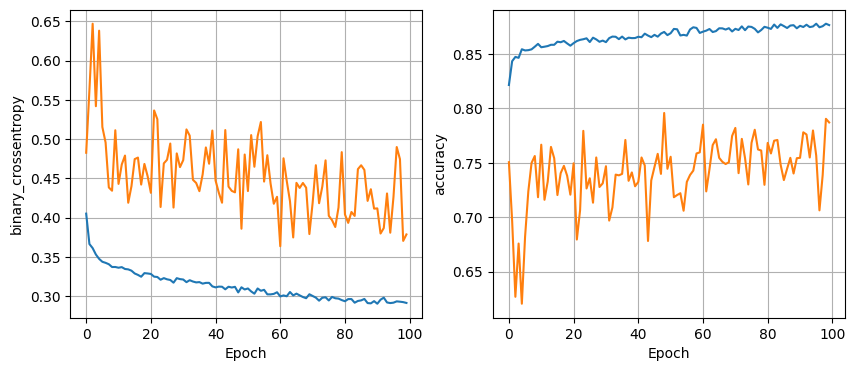

119/119 [==============================] - 0s 1ms/step - loss: 0.2987 - accuracy: 0.8749
no. of nodes: 64, dropout: 0.2, batch_size: 128, learning rate: 0.01


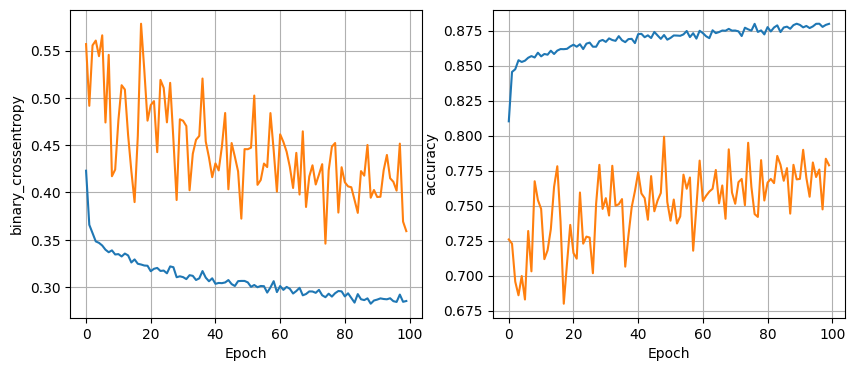

119/119 [==============================] - 0s 1ms/step - loss: 0.3088 - accuracy: 0.8746
no. of nodes: 64, dropout: 0.2, batch_size: 32, learning rate: 0.005


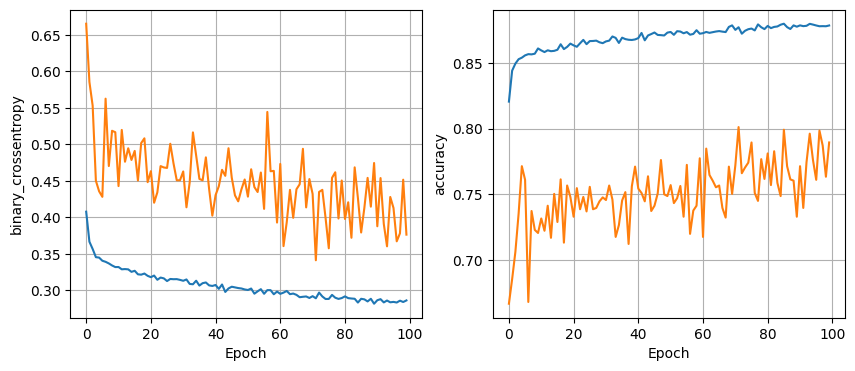

119/119 [==============================] - 0s 1ms/step - loss: 0.3020 - accuracy: 0.8757
no. of nodes: 64, dropout: 0.2, batch_size: 64, learning rate: 0.005


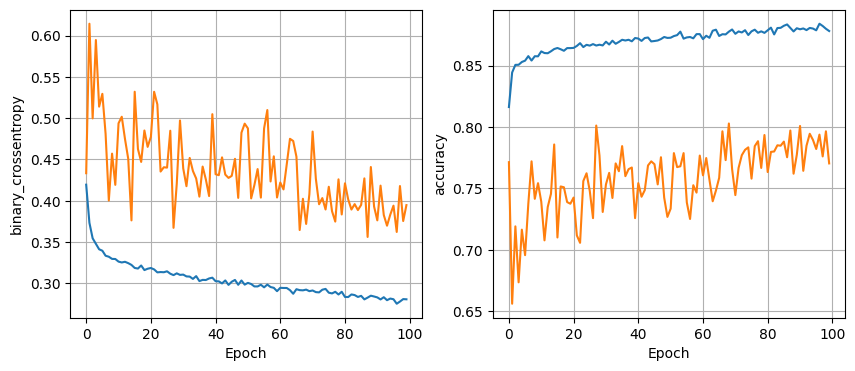

119/119 [==============================] - 0s 1ms/step - loss: 0.2992 - accuracy: 0.8770
no. of nodes: 64, dropout: 0.2, batch_size: 128, learning rate: 0.005


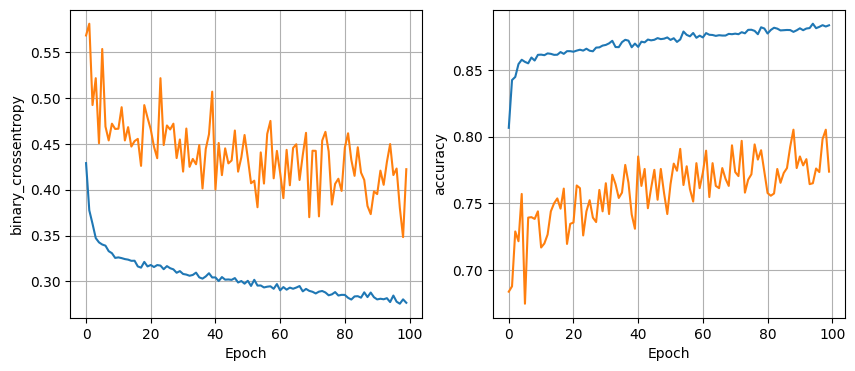

119/119 [==============================] - 0s 1ms/step - loss: 0.2905 - accuracy: 0.8783
no. of nodes: 64, dropout: 0.2, batch_size: 32, learning rate: 0.001


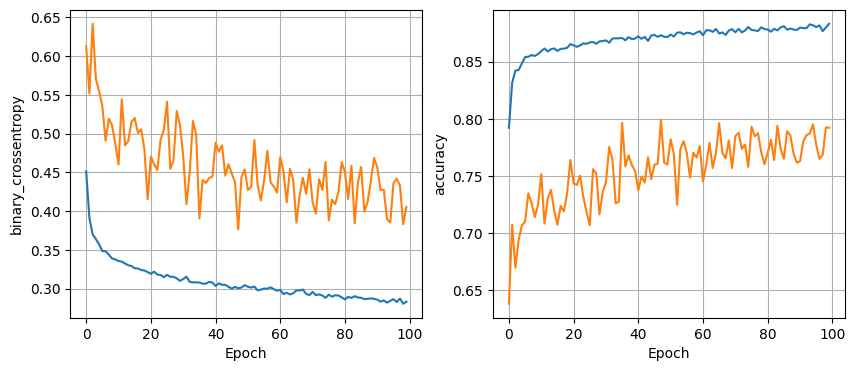

119/119 [==============================] - 0s 1ms/step - loss: 0.2828 - accuracy: 0.8807
no. of nodes: 64, dropout: 0.2, batch_size: 64, learning rate: 0.001


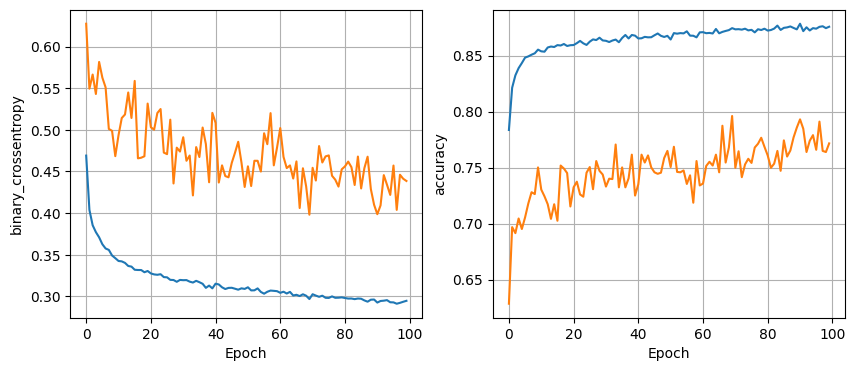

119/119 [==============================] - 0s 1ms/step - loss: 0.2894 - accuracy: 0.8754
no. of nodes: 64, dropout: 0.2, batch_size: 128, learning rate: 0.001


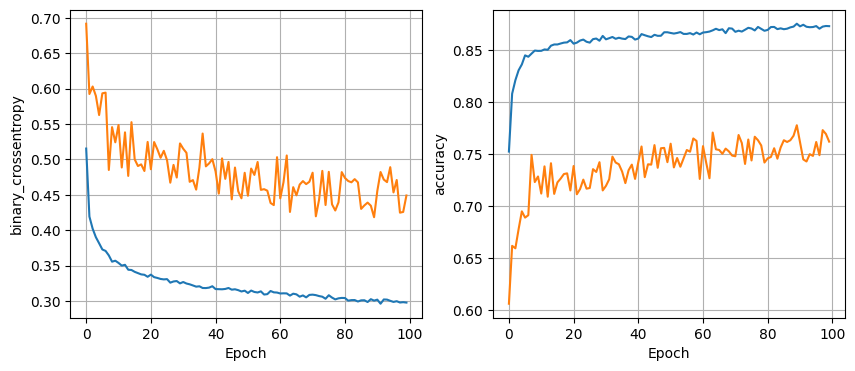

119/119 [==============================] - 0s 1ms/step - loss: 0.2927 - accuracy: 0.8757


In [35]:
least_val_loss = float("inf")
least_loss_model = None
epochs = 100
for num_nodes in[16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"no. of nodes: {num_nodes}, dropout: {dropout_prob}, batch_size: {batch_size}, learning rate: {lr}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob,  lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)
        # if val_loss < least_val_loss:
        #   least_val_loss = val_loss
        #   least_loss_model = model